# A3
## Part 1 - Minimize energy spread in DFT of sinusoids

In [40]:
from scipy.fftpack import fft, fftshift
import numpy as np
from fractions import gcd
import sys
sys.path.append('../../software/models/')
from dftModel import dftAnal, dftSynth
from scipy.signal import get_window
import matplotlib.pyplot as plt
import math

Given a signal consisting of two sinusoids, write a function that selects the first `M` samples from the signal and returns the positive half of the DFT magnitude spectrum (in dB), such that it has only two non-zero values. 

`M` is to be calculated as the smallest positive integer for which the positive half of the DFT magnitude spectrum has only two non-zero values. To get the positive half of the spectrum, first compute the `M` point DFT of the input signal (for this you can use the `fft` function of `scipy.fftpack`, which is already imported in this script). Consider only the first `(M/2)+1` samples of the DFT and compute the magnitude spectrum of the positive half (in dB) as `mX = 20*log10(abs(X[:M/2+1]))`, where `X` is the DFT of the input.

The input arguments to this function are the input signal `x` (of length `W >= M`) consisting of two sinusoids of frequency `f1` and `f2`, the sampling frequency `fs` and the value of frequencies `f1` and `f2`. The function should return the positive half of the magnitude spectrum `mX`. For this question, you can assume the input frequencies `f1` and `f2` to be positive integers and factors of `fs`, and that `M` is even. 

Due to the precision of the FFT computation, the zero values of the DFT are not zero but very small values < 1e-12 (or -240 dB) in magnitude. For practical purposes, all values with absolute value less than 1e-6 (or -120 dB) can be considered to be zero. 

HINT: The DFT magnitude spectrum of a sinusoid has only one non-zero value (in the positive half of the DFT spectrum) when its frequency coincides with one of the DFT bin frequencies. This happens when the DFT size (`M` in this question) contains exactly an integer number of periods of the sinusoid. Since the signal in this question consists of two sinusoids, this condition should hold true for each of the sinusoids, so that the DFT magnitude spectrum has only two non-zero values, one per sinusoid. 

`M` can be computed as the Least Common Multiple (LCM) of the sinusoid periods (in samples). The LCM of two numbers `x`, `y` can be computed as: `x*y/GCD(x,y)`, where GCD denotes the greatest common divisor. In this script (see above) we have already imported `fractions.gcd()` function that computes the GCD. 

In [31]:
def minimizeEnergySpreadDFT(x, fs, f1, f2):
    """
    Inputs:
        x (numpy array) = input signal 
        fs (float) = sampling frequency in Hz
        f1 (float) = frequency of the first sinusoid component in Hz
        f2 (float) = frequency of the second sinusoid component in Hz
    Output:
        The function should return 
        mX (numpy array) = The positive half of the DFT spectrum (in dB) of the M sample segment of x. 
                           mX is (M/2)+1 samples long (M is to be computed)
    """
    gcf = gcd(f1, f2)
    M = (fs//gcf)

    x1 = x[:M]

    X = fft(x1)

    mX = 20 * np.log10(abs(X))

    return mX[:M//2+1]
    


Test case 1: For an input signal `x` sampled at `fs = 10000` Hz that consists of sinusoids of frequency `f1 = 80` Hz and `f2 = 200` Hz, you need to select `M = 250` samples of the signal to meet the required condition. In this case, output `mX` is 126 samples in length and has non-zero values at bin indices 2 and 5 (corresponding to the frequency values of 80 and 200 Hz, respectively). You can create a test signal `x` by generating and adding two sinusoids of the given frequencies.

Test case 2: For an input signal `x` sampled at `fs = 48000` Hz that consists of sinusoids of frequency `f1 = 300` Hz and `f2 = 800` Hz, you need to select `M = 480` samples of the signal to meet the required condition. In this case, output `mX` is 241 samples in length and has non-zero values at bin indices 3 and 8 (corresponding to the frequency values of 300 and 800 Hz, respectively). You can create a test signal `x` by generating and adding two sinusoids of the given frequencies.

In [39]:
t = np.arange(-1, 1, 1/10000)
x = 0.8 * (np.cos(2 * np.pi * 80 * t) + np.cos(2 * np.pi * 200 *t))
print(len(minimizeEnergySpreadDFT(x, 10000, 80,200)))

126


/home/jeovach/anaconda3-5.0/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: fractions.gcd() is deprecated. Use math.gcd() instead.
  del sys.path[0]


## Part 2 - Optimal zero-padding

Given a sinusoid, write a function that computes the DFT of the sinusoid after zero-padding and returns the positive half of the magnitude spectrum (in dB). Zero-padding needs to be done such that one of the bin frequencies of the DFT coincides with the frequency of the sinusoid. Choose the minimum zero-padding length for which this condition is satisfied. 

The input arguments are the sinusoid `x` of length `M`, sampling frequency `fs` and the frequency of the sinusoid `f`. The output is the positive half of the magnitude spectrum `mX` computed using the `N` point DFT `(N >= M)` of `x` after zero-padding `x` to length `N` appropriately as required. 

To get the positive half of the spectrum, first compute the `N` point DFT of the zero-padded input signal (for this you can use the `fft` function of `scipy.fftpack`, which is already imported in this script). Consider only the first `(N/2)+1` samples of the DFT and compute the magnitude spectrum of the positive half (in dB) as `mX = 20*log10(abs(X[:(N/2)+1]))`, where `X` is the `N` point DFT of the zero-padded input.

For this exercise, you can assume that the frequency of the sinusoid `f` is a positive integer and a factor of the sampling rate `fs`. The input parameters will be given in such a way that `N` will be even.  Note that the numerical value of `f` is an integer but the data type is float, for example 1.0, 2.0, 55.0 etc. This is to avoid issues in python related with division by a integer.

Due to the precision of the FFT computation, the zero values of the DFT are not zero but very small values < 1e-12 (or -240 dB) in magnitude. For practical purposes, all values with absolute value less than 1e-6 (or -120 dB) can be considered to be zero. 

HINT: One of the DFT bin frequencies coincides with the frequency `f` of a sinusoid when the DFT size (`N` in this question) contains exactly an integer number of periods of the sinusoid. For example, if `f = 100` Hz and `fs = 1000` Hz, one period of the sinusoid has 10 samples. Then given a signal of length `M = 25` samples, there are 2.5 periods in it. The minimum zero-padding length here would be 5 samples (0.5 period), so that the DFT size `N = 30` corresponds to 3 periods of a sinusoid of frequency `f=100` Hz.

In [59]:
def optimalZeropad(x, fs, f):
    """
    Inputs:
        x (numpy array) = input signal of length M
        fs (float) = sampling frequency in Hz
        f (float) = frequency of the sinusoid in Hz
    Output:
        The function should return
        mX (numpy array) = The positive half of the DFT spectrum of the N point DFT after zero-padding 
                        x appropriately (zero-padding length to be computed). mX is (N/2)+1 samples long
    """
    ## Your code here
    W = len(x)

    #numsample = int((1.0 / f) * fs)
    numsample = int((1.0 / gcd(f, fs)) * fs)

    if W != numsample:
        if W < numsample:
            sample_needed = numsample - W
            #M = 2 * numsample
        else :
            if W % numsample == 0:
                sample_needed = 0
            else:
                sample_needed = numsample - (W % numsample)
            

    M = W + sample_needed
    
    hM1 = int(math.floor((W+1)/2))
    hM2 = int(math.floor(W/2))

    fftbuffer = np.zeros(M)
    fftbuffer[:hM1] = x[hM2:]
    fftbuffer[M-hM2:] = x[:hM2]

    X = fft(fftbuffer)
    mX = 20 * np.log10(abs(X))
    return mX[:M//2 + 1]

Test case 1: For a sinusoid `x` with `f = 100` Hz, `M = 25` samples and `fs = 1000` Hz, you will need to zero-pad by 5 samples and compute an `N = 30` point DFT. In the magnitude spectrum, you can see a maximum value at bin index 3 corresponding to the frequency of `100` Hz. The output `mX` you return is 16 samples in length. 

Test case 2: For a sinusoid `x` with `f = 250` Hz, `M = 210` samples and `fs = 10000` Hz, you will need to zero-pad by 30 samples and compute an `N = 240` point DFT. In the magnitude spectrum, you can see a maximum value at bin index 6 corresponding to the frequency of 250 Hz. The output `mX` you return is 121 samples in length. 

In [60]:
t = np.arange(-1, 1, 1 / 1000)[:25]
x = 0.8*(np.cos(2*np.pi*100*t))
print(len(optimalZeropad(x, 1000, 100)))

16


/home/jeovach/anaconda3-5.0/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: fractions.gcd() is deprecated. Use math.gcd() instead.
  app.launch_new_instance()


## Part 3 - Symmetry properties of the DFT

Write a function to check if the input signal is real and even using the symmetry properties of its DFT. The function will return the result of this test, the zerophase windowed version of the input signal (`dftbuffer`), and the DFT of the `dftbuffer`. 

Given an input signal `x` of length `M`, do a zero phase windowing of `x` without any zero-padding (a `dftbuffer`, on the same lines as the `fftbuffer` in `sms-tools`). Then compute the `M` point DFT of the zero phase windowed signal and use the symmetry of the computed DFT to test if the input signal `x` is real and even. Return the result of the test, the `dftbuffer` computed, and the DFT of the `dftbuffer`. 

The input argument is a signal `x` of length `M`. The output is a tuple with three elements 
`(isRealEven, dftbuffer, X)`, where `isRealEven` is a boolean variable which is `True` if `x` is real and even, else `False`. `dftbuffer` is the `M` length zero phase windowed version of `x`. `X` is the `M` point DFT of the `dftbuffer`. 

To make the problem easier, we will use odd length input sequence in this question (`M` is odd). 

Due to the precision of the FFT computation, the zero values of the DFT are not zero but very small values < 1e-12 in magnitude. For practical purposes, all values with absolute value less than 1e-6 can be considered to be zero. Use an error tolerance of 1e-6 to compare if two floating point arrays are equal. 

Caveat: Use the imaginary part of the spectrum instead of the phase to check if the input signal is real and even.

In [64]:
def testRealEven(x):
    """
    Inputs:
        x (numpy array)= input signal of length M (M is odd)
    Output:
        The function should return a tuple (isRealEven, dftbuffer, X)
        isRealEven (boolean) = True if the input x is real and even, and False otherwise
        dftbuffer (numpy array, possibly complex) = The M point zero phase windowed version of x 
        X (numpy array, possibly complex) = The M point DFT of dftbuffer 
    """
    M = len(x)

    fftbuffer = np.zeros(M)
    fftbuffer[:M//2+1] = x[M//2:]
    fftbuffer[M//2+1:] = x[:M//2]

    X = fft(fftbuffer)
    mX = abs(X)
    pX = np.angle(X)

    isReal = True

    for i in range(len(X)):
        if i > 0 and i <= len(X)/2:
            if mX[i] != mX[len(X)-i]:
                isReal = False
                break
        if abs(X.imag[i]) >= 1e-6 and abs(X.imag[i]) >= np.pi * 10**-6:
            isReal = False
            break
    
    return (isReal, fftbuffer, X)


Test case 1: If `x = np.array([ 2, 3, 4, 3, 2 ])`, which is a real and even signal (after zero phase windowing), the function returns 

```
(True, array([ 4., 3., 2., 2., 3.]), array([14.0000+0.j, 2.6180+0.j, 
0.3820+0.j, 0.3820+0.j, 2.6180+0.j])) (values are approximate)
```

Test case 2: If `x = np.array([1, 2, 3, 4, 1, 2, 3])`, which is not a even signal (after zero phase windowing), the function returns 

```
(False,  array([ 4.,  1.,  2.,  3.,  1.,  2.,  3.]), array([ 16.+0.j, 
2.+0.69j, 2.+3.51j, 2.-1.08j, 2.+1.08j, 2.-3.51j, 2.-0.69j])) (values are approximate)
```


In [65]:
testRealEven(np.array([ 2, 3, 4, 3, 2 ]))

(True,
 array([ 4.,  3.,  2.,  2.,  3.]),
 array([ 14.00000000+0.j,   2.61803399+0.j,   0.38196601+0.j,
          0.38196601-0.j,   2.61803399-0.j]))

## Part 4 - Suppressing frequency components using DFT model

Given a frame of the signal, write a function that uses the `dftModel` functions to suppress all the 
frequency components <= 70Hz in the signal and returns the output of the `dftModel` with and without filtering. 

You will use the DFT model to implement a very basic form of filtering to suppress frequency components. 
When working close to mains power lines, there is a 50/60 Hz hum that can get introduced into the 
audio signal. You will try to remove that using a basic DFT model based filter. You will work on just 
one frame of a synthetic audio signal to see the effect of filtering. 

You can use the functions `dftAnal` and `dftSynth` provided by the `dftModel` file of `sms-tools`. Use `dftAnal` 
to obtain the magnitude spectrum (in dB) and phase spectrum of the audio signal. Set the values of 
the magnitude spectrum that correspond to frequencies <= 70 Hz to -120dB (there may not be a bin 
corresponding exactly to 70 Hz, choose the nearest bin of equal or higher frequency, e.g., using `np.ceil()`).
If you have doubts converting from frequency (Hz) to bins, you can review the beginning of theory lecture 2T1.

Use `dftSynth` to synthesize the filtered output signal and return the output. The function should also return the 
output of `dftSynth` without any filtering (without altering the magnitude spectrum in any way). 
You will use a hamming window to smooth the signal. Hence, do not forget to scale the output signals 
by the sum of the window values (as done in `sms-tools/software/models_interface/dftModel_function.py`). 
To understand the effect of filtering, you can plot both the filtered output and non-filtered output 
of the `dftModel`. 

Please note that this question is just for illustrative purposes and filtering is not usually done 
this way - such sharp cutoffs introduce artifacts in the output. 

The input is a `M` length input signal `x` that contains undesired frequencies below 70 Hz, sampling 
frequency `fs` and the FFT size `N`. The output is a tuple with two elements `(y, yfilt)`, where `y` is the 
output of `dftModel` with the unaltered original signal and `yfilt` is the filtered output of the `dftModel`.

Caveat: In python (as well as numpy) variable assignment is by reference. if you assign B = A, and 
modify B, the value of A also gets modified. If you do not want this to happen, consider using B = A.copy(). 
This creates a copy of A and assigns it to B, and hence, you can modify B without affecting A.

In [66]:
def suppressFreqDFTmodel(x, fs, N):
    """
    Inputs:
        x (numpy array) = input signal of length M (odd)
        fs (float) = sampling frequency (Hz)
        N (positive integer) = FFT size
    Outputs:
        The function should return a tuple (y, yfilt)
        y (numpy array) = Output of the dftSynth() without filtering (M samples long)
        yfilt (numpy array) = Output of the dftSynth() with filtering (M samples long)
    The first few lines of the code have been written for you, do not modify it. 
    """
    M = len(x)
    bin70 = int(np.ceil(70.0*N/fs))
    w = get_window("hamming", M)
    mX, pX = dftAnal(x, w, N)    
    mX2 = mX.copy()
    mX2[:bin70 + 1] = -120
    y = dftSynth(mX, pX, M) * sum(w)
    yfilt = dftSynth(mX2, pX, M) * sum(w)
    
    return (y, yfilt)
    

Test case 1: For an input signal with 40 Hz, 100 Hz, 200 Hz, 1000 Hz components, `yfilt` will only contain
100 Hz, 200 Hz and 1000 Hz components. 

Test case 2: For an input signal with 23 Hz, 36 Hz, 230 Hz, 900 Hz, 2300 Hz components, `yfilt` will only contain
230 Hz, 900 Hz and 2300 Hz components. 

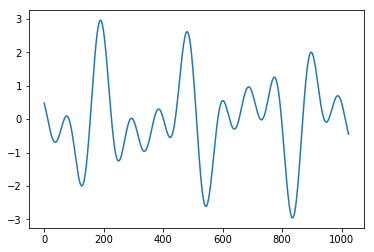

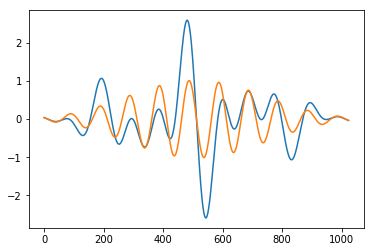

In [67]:
A = 1.
f0 = 1000
phi = np.pi/2
fs = 10000
N = 1024
ty = (N * (1.0/fs)) / 2
t = np.arange(-ty, ty, 1.0/fs)
x1 = A * np.cos(2 * np.pi * 40 * t +phi)
x2 = A * np.cos(2 * np.pi * 70 * t +phi)
x3 = A * np.cos(2 * np.pi * 100 * t +phi)
x = x1 + x2 + x3
plt.plot(x)
plt.show()
(y, yfilt) = suppressFreqDFTmodel(x, fs, 1024)
plt.plot(y)
plt.plot(yfilt)
plt.show()

## Part 5 - FFT size and zero-padding (Optional)

Write a function that takes in an input signal, computes three different FFTs on the input and returns 
the first 80 samples of the positive half of the FFT magnitude spectrum (in dB) in each case. 

This part is a walk-through example to provide some insights into the effects of the length of signal 
segment, the FFT size, and zero-padding on the FFT of a sinusoid. The input to the function is `x`, which
is 512 samples of a real sinusoid of frequency 110 Hz and the sampling frequency `fs = 1000` Hz. You will 
first extract the first 256 samples of the input signal and store it as a separate variable `xseg`. You 
will then generate two `'hamming'` windows `w1` and `w2` of size 256 and 512 samples, respectively (code given
below). The windows are used to smooth the input signal. Use `dftAnal` to obtain the positive half of the 
FFT magnitude spectrum (in dB) for the following cases:

Case-1: Input signal `xseg` (256 samples), window `w1` (256 samples), and FFT size of 256

Case-2: Input signal `x` (512 samples), window `w2` (512 samples), and FFT size of 512

Case-3: Input signal `xseg` (256 samples), window `w1` (256 samples), and FFT size of 512 (Implicitly does a 
        zero-padding of xseg by 256 samples)
        
Return the first 80 samples of the positive half of the FFT magnitude spectrum output by `dftAnal`. 

To understand better, plot the output of `dftAnal` for each case on a common frequency axis. Let `mX1`, `mX2`, 
`mX3` represent the outputs of `dftAnal` in each of the Cases 1, 2, and 3 respectively. You will see that 
`mX3` is the interpolated version of `mX1` (zero-padding leads to interpolation of the DFT). You will also 
observe that the 'mainlobe' of the magnitude spectrum in `mX2` will be much smaller than that in `mX1` and 
`mX3`. This shows that choosing a longer segment of signal for analysis leads to a narrower mainlobe with 
better frequency resolution and less spreading of the energy of the sinusoid. 

If we were to estimate the frequency of the sinusoid using its DFT, a first principles approach is to 
choose the frequency value of the bin corresponding to the maximum in the DFT magnitude spectrum. 
Some food for thought: if you were to take this approach, which of the Cases 1, 2, or 3 will give you 
a better estimate of the frequency of the sinusoid ? Comment and discuss on the forums!

In [71]:
def zpFFTsizeExpt(x, fs):
    """
    Inputs:
        x (numpy array) = input signal (2*M = 512 samples long)
        fs (float) = sampling frequency in Hz
    Output:
        The function should return a tuple (mX1_80, mX2_80, mX3_80)
        mX1_80 (numpy array): The first 80 samples of the magnitude spectrum output of dftAnal for Case-1
        mX2_80 (numpy array): The first 80 samples of the magnitude spectrum output of dftAnal for Case-2
        mX3_80 (numpy array): The first 80 samples of the magnitude spectrum output of dftAnal for Case-3
        
    The first few lines of the code to generate xseg and the windows have been written for you, 
    please use it and do not modify it. 
    """
    
    M = len(x)//2
    xseg = x[:M]
    w1 = get_window('hamming',M)
    w2 = get_window('hamming',2*M)
    ## Your code here
    mX1, pX1 = dftAnal(xseg, w1, 256)
    mX2, pX2 = dftAnal(x, w2, 512)

    mX3, pX3 = dftAnal(xseg, w1, 512)

    mX1_80 = mX1[:80]
    mX2_80 = mX2[:80]
    mX3_80 = mX3[:80]

    return (mX1_80, mX2_80, mX3_80)


Test case 1: The input signal is `x` (of length 512 samples), the output is a tuple with three elements: 
`(mX1_80, mX2_80, mX3_80)` where `mX1_80`, `mX2_80`, `mX3_80` are the first 80 samples of the magnitude spectrum 
output by `dftAnal` in cases 1, 2, and 3, respectively. 

80


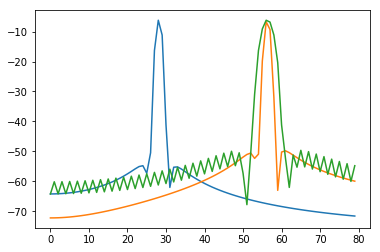

In [72]:
A = 1.
f0 = 110
phi = np.pi/2
fs = 1000
N = 512
ty = (N * (1.0/fs)) / 2
t = np.arange(-ty, ty, 1.0/fs)
x = A * np.cos(2 * np.pi * f0 * t +phi)
(mX1_80, mX2_80, mX3_80) = zpFFTsizeExpt(x, fs)
print(len(mX1_80))
plt.plot(mX1_80)
plt.plot(mX2_80)
plt.plot(mX3_80)
plt.show()